 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [195]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

whale_path=Path("//Users//pigeoneyevideography//Desktop//Module 4//Resources//whale_returns.csv")
algo_path=Path("//Users//pigeoneyevideography//Desktop//Module 4//Resources//algo_returns.csv")
sp500_path=Path("//Users//pigeoneyevideography//Desktop//Module 4//Resources//sp500_history.csv")

whaledf = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True).sort_index()
algodf = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True).sort_index()
sp500df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True).sort_index()


/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_2652/4182794155.py:14: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  whaledf = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True).sort_index()
/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_2652/4182794155.py:15: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  algodf = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True).sort_index()
/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_2652/4182794155.py:16: 

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [196]:

whaledf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [197]:
# Reading whale returns

whaledfdailyreturns=whaledf
whaledfdailyreturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [198]:
# Count nulls
whaledfdailyreturns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [199]:
# Drop nulls
whaledfdailyreturns.dropna(inplace=True)
whaledfdailyreturns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [200]:
whaledfdailyreturns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [201]:
# Reading algorithmic returns
algodfdailyreturns=algodf
algodfdailyreturns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [202]:
# Count nulls
algodfdailyreturns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [203]:
# Drop nulls
algodfdailyreturns.dropna(inplace=True)
algodfdailyreturns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [204]:
# Reading S&P 500 Closing Prices
sp500df=sp500df.rename(columns={'Date':'Date', 'Close':'SP500 close'})
sp500df.head()

,SP500 close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [205]:
# Check Data Types
print(sp500df.dtypes)

SP500 close    object
dtype: object


In [206]:
# Fix Data Types
sp500df['SP500 close']=sp500df['SP500 close'].str.replace('$','')
sp500df.head()

,SP500 close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [207]:
# Calculate Daily Returns
sp500df['SP500 close']=sp500df['SP500 close'].astype("float")
sp500dailyreturns=sp500df.pct_change()
sp500dailyreturns.head()

,SP500 close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [208]:
# Drop nulls
sp500dailyreturns.dropna(inplace=True)

In [209]:
# Rename `Close` Column to be specific to this portfolio.
sp500dailyreturns.rename(columns={'Close': 'Returns'}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [210]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combinedf=pd.concat([whaledfdailyreturns, algodfdailyreturns, sp500dailyreturns], axis='columns', join='inner')
combinedf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

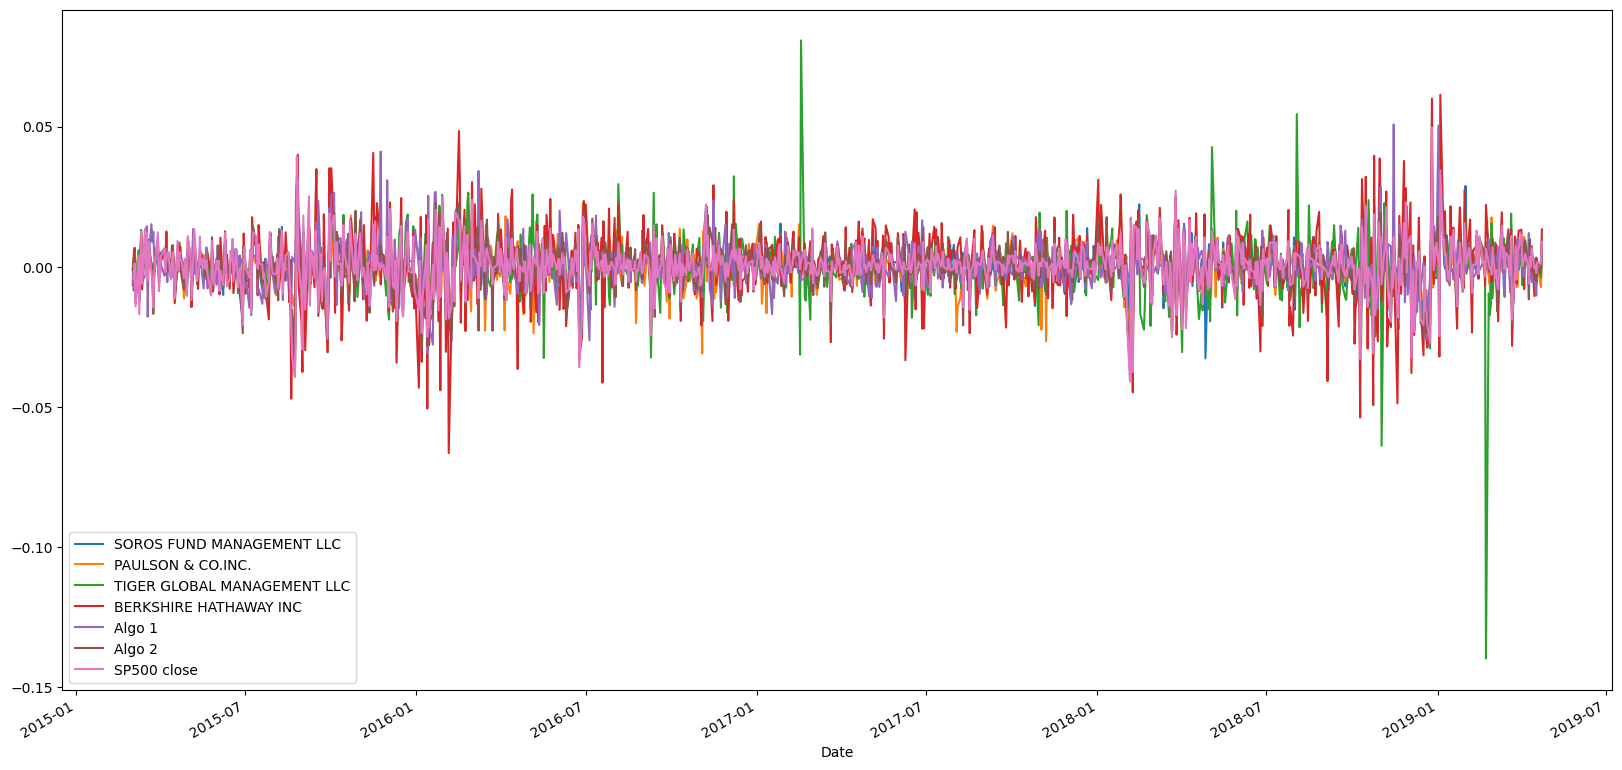

In [211]:
# Plot daily returns of all portfolios
combinedf.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

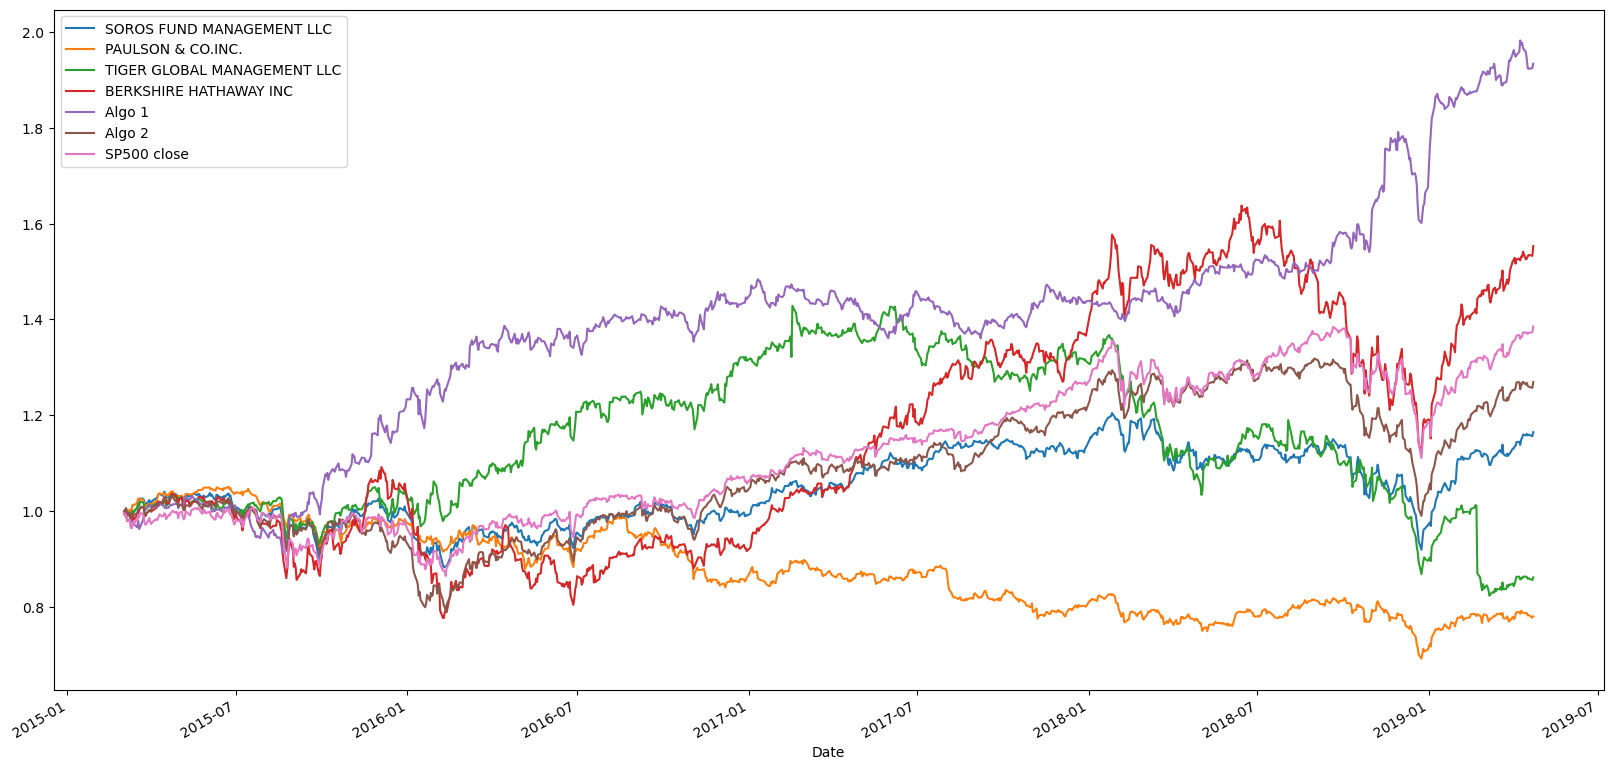

In [212]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
cumulative=(1+combinedf).cumprod().plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

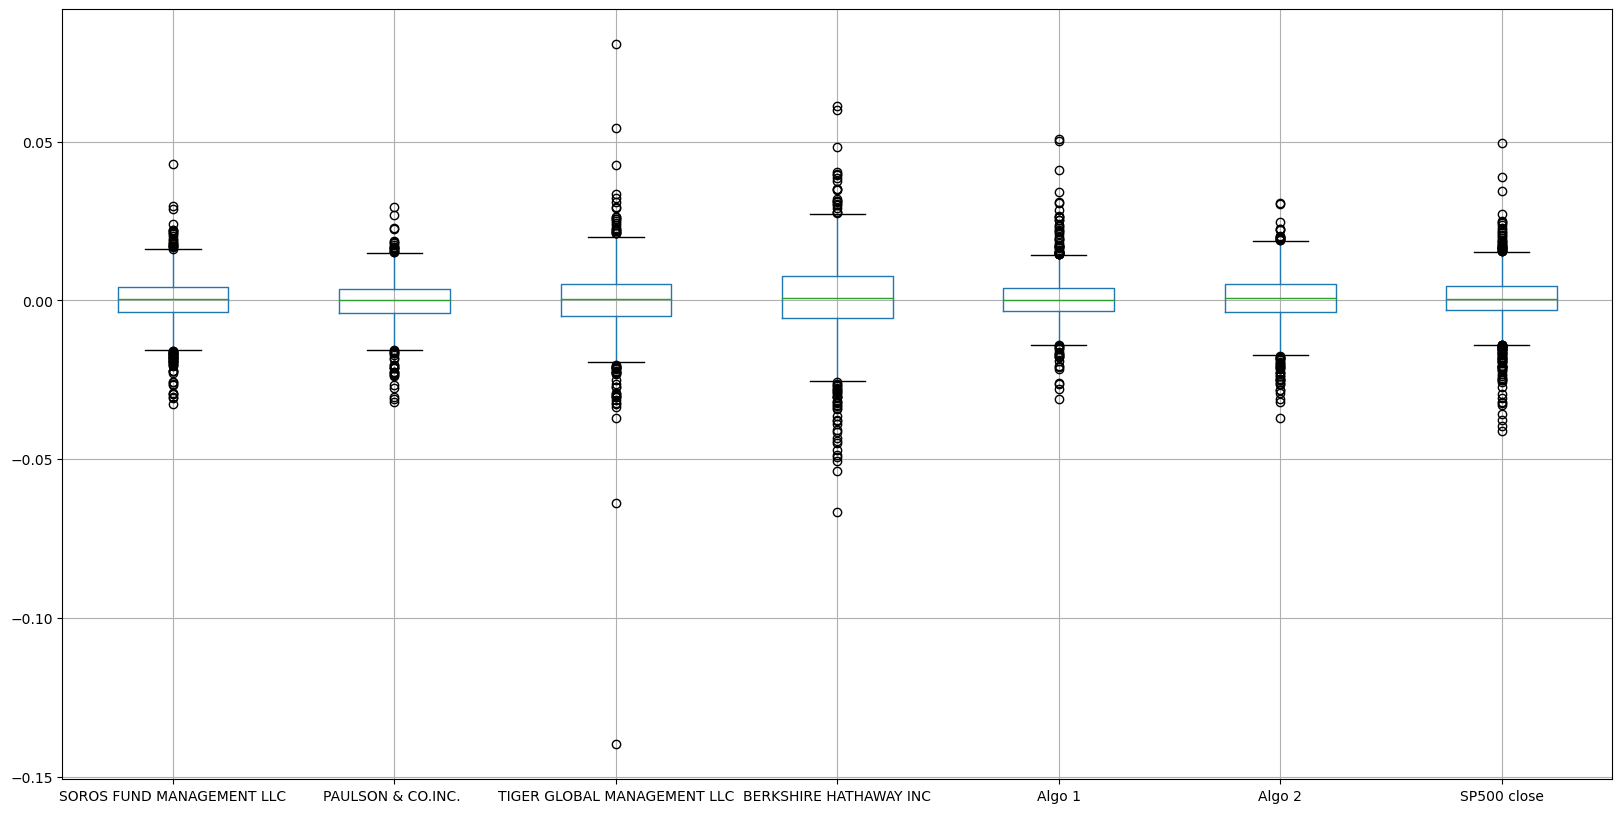

In [213]:
combinedf.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [214]:
# Calculate the daily standard deviations of all portfolios
combinedfstd=combinedf.std()
sp500dfstd=sp500df.std()
algodfstd=algodf.std()
whaledfstd=whaledf.std()

### Determine which portfolios are riskier than the S&P 500

In [215]:
# Calculate  the daily standard deviation of S&P 500
combinedfrisk=combinedfstd*np.sqrt(252)

# Determine which portfolios are riskier than the S&P 500
print('highest risk portfolio compared to sp500 is the one with the maximum of these numbers:')
combinedfrisksorted=combinedfstd.sort_values(ascending=False)
combinedfrisksorted.head()


highest risk portfolio compared to sp500 is the one with the maximum of these numbers:


BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500 close                    0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
dtype: float64

### Calculate the Annualized Standard Deviation

In [216]:
# Calculate the annualized standard deviation (252 trading days)
combinedfstdanual=combinedfstd * np.sqrt(252)
combinedfstdanual.head()

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

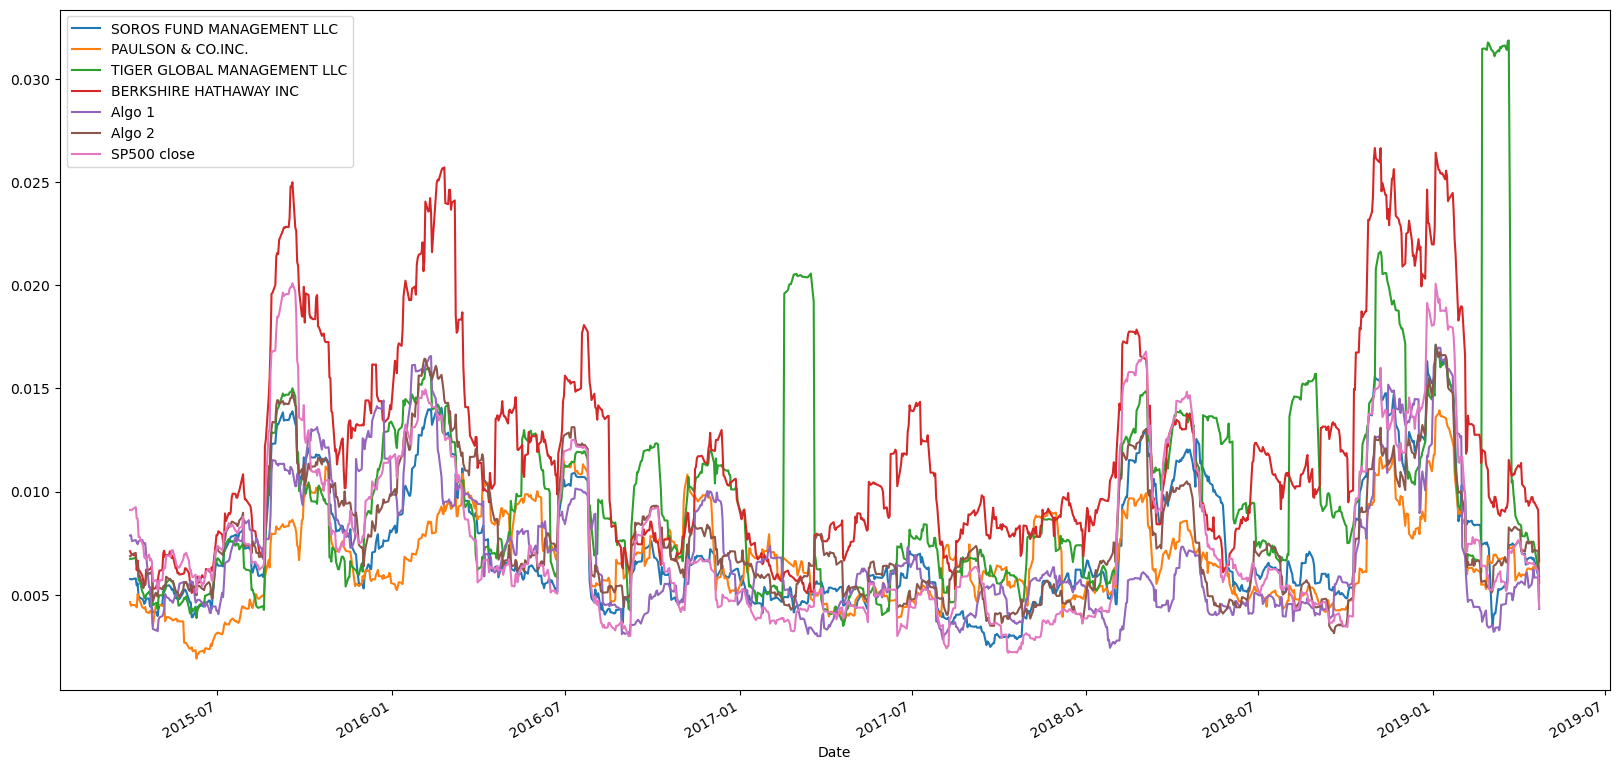

In [217]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combinedfstdrolling21=combinedf.rolling(window=21).std()

# Plot the rolling standard deviation
combinedfstdrolling21.plot(figsize=(20,10))

### Calculate and plot the correlation

<Axes: >

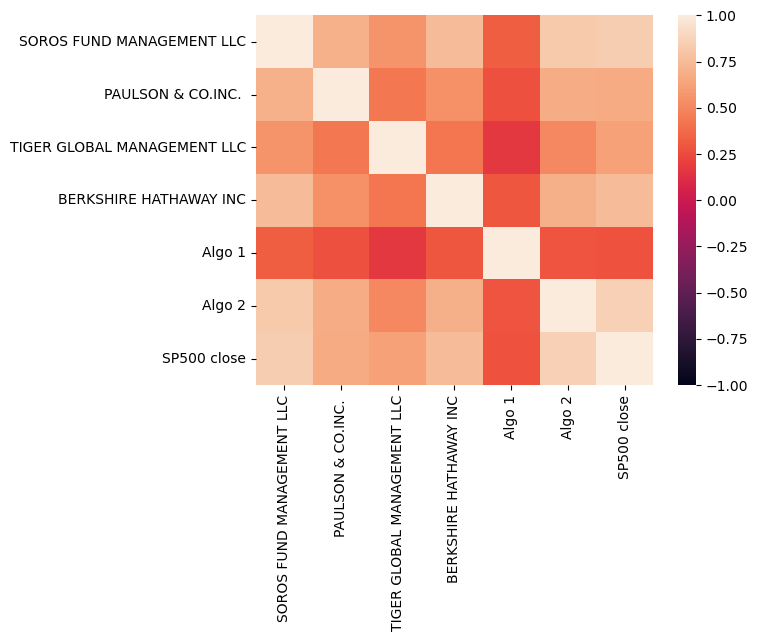

In [218]:
# Calculate the correlation
combinedfcorr=combinedf.corr()

# Display de correlation matrix
sns.heatmap(combinedfcorr, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

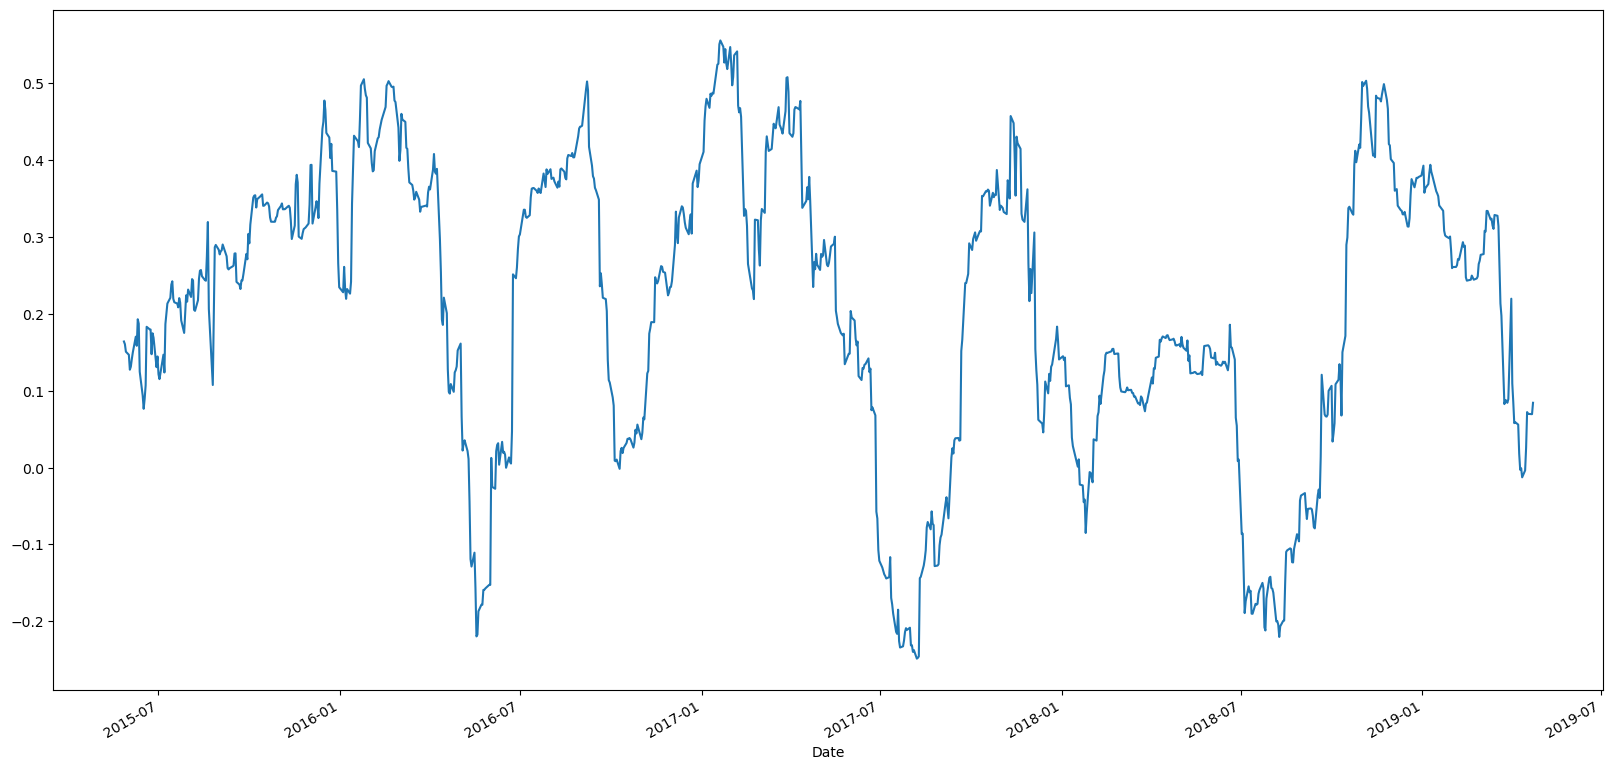

In [246]:
# Calculate covariance of a single portfolio

algodfcov=combinedf['Algo 1'].rolling(window=60).cov(combinedf['SP500 close'])

# Calculate variance of S&P 500
sp500dfvar=combinedf['SP500 close'].rolling(window=60).var()

# Computing beta
algodfbeta=algodfcov/sp500dfvar

# Plot beta trend
algodfbeta.plot(figsize=(20,10))


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [247]:
# Use `ewm` to calculate the rolling window
#combinedfrollingstd=combinedf.rolling(window=21).std()
combinedfewm=combinedf.ewm(halflife=21).mean()
combinedfewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761,-0.004462
2015-03-05,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988,-0.002514
2015-03-06,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542,-0.005575
2015-03-09,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935,-0.003543


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [221]:
# Annualized Sharpe Ratios
combinedfsr=combinedf.mean()*252/(combinedfstd*np.sqrt(252))

<Axes: >

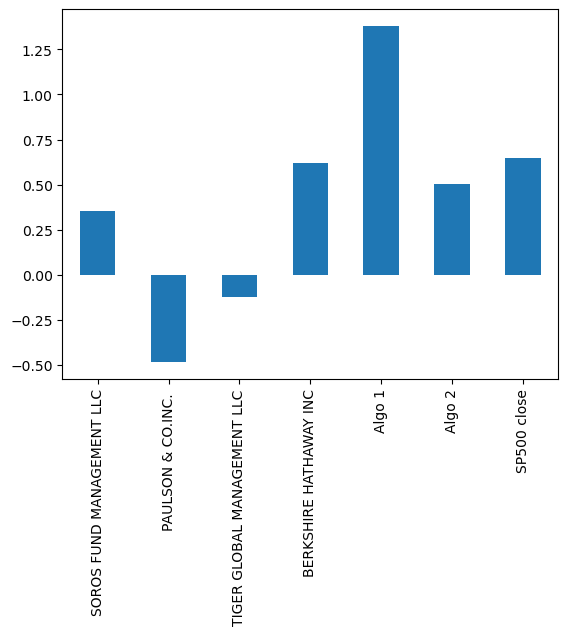

In [222]:
# Visualize the sharpe ratios as a bar plot
combinedfsr.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

# Algo1 did well, better than the market.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [223]:
# Reading data from 1st stock
aapl_path=Path("//Users//pigeoneyevideography//Desktop//Module 4//Resources//aapl_historical.csv")
aapldf= pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index()
aapldf.head()


/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_2652/3349061575.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  aapldf= pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index()


,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [224]:
# Reading data from 2nd stock
cost_path=Path("//Users//pigeoneyevideography//Desktop//Module 4//Resources//cost_historical.csv")
costdf = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index()
costdf.head()

/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_2652/775642091.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  costdf = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index()


,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [225]:
# Reading data from 3rd stock
goog_path=Path("//Users//pigeoneyevideography//Desktop//Module 4//Resources//goog_historical.csv")
googdf = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index()
googdf.head()

/var/folders/k0/94snjnyj0_qb2hdn44hh2tlm0000gn/T/ipykernel_2652/2168574926.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  googdf = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True).sort_index()


,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [226]:
# Combine all stocks in a single DataFrame
combined2df=pd.concat([aapldf, costdf, googdf], axis='columns', join='inner')
combined2df.head(100)


,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59
...,...,...,...,...,...,...
2018-09-26,AAPL,220.42,COST,233.81,GOOG,1180.49
2018-09-27,AAPL,224.95,COST,234.00,GOOG,1194.64
2018-09-28,AAPL,225.74,COST,234.88,GOOG,1193.47


In [227]:
# Reset Date index
combined2dfsorted=combined2df.sort_index()
combined2dfsorted.head()


,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,COST,195.76,GOOG,1098.26
2018-05-14,AAPL,188.15,COST,195.88,GOOG,1100.20
2018-05-15,AAPL,186.44,COST,195.48,GOOG,1079.23
2018-05-16,AAPL,188.18,COST,198.71,GOOG,1081.77
2018-05-17,AAPL,186.99,COST,199.60,GOOG,1078.59


In [228]:
# Reorganize portfolio data by having a column per symbol
combined2dfsorted.columns=["1", "AAPL NOCP", "2", "COST NOCP", "3","GOOG NOCP"]
combined2dfsorted=combined2dfsorted.drop(columns=["1","2","3"])
combined2dfsorted.head()

,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [229]:
# Calculate daily returns
combined2dfsorted=combined2dfsorted.pct_change()

# Drop NAs
combined2dfsorted.dropna(inplace=True)

# Display sample data
combined2dfsorted.head()


,AAPL NOCP,COST NOCP,GOOG NOCP
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [230]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
combine2dfweights=combined2dfsorted.dot(weights)
# Display sample data
combine2dfweights.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [249]:
# Join your returns DataFrame to the original returns DataFrame
combineall=pd.concat([combinedf, combine2dfweights], axis=1,join='inner').sort_index()
combineall.rename(columns={0:'combine2 df weights'}, inplace=True)
combineall.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 close,combine2 df weights
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [250]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combineall.dropna(inplace=True)
combineall.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 close,combine2 df weights
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [251]:
# Calculate the annualized `std`
combineallannualstd=combineall.std()*np.sqrt(252)
combineallannualstdsorted=combineallannualstd.sort_values(ascending=True)
combineallannualstd.head(10)

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP500 close                    0.152054
combine2 df weights            0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: >

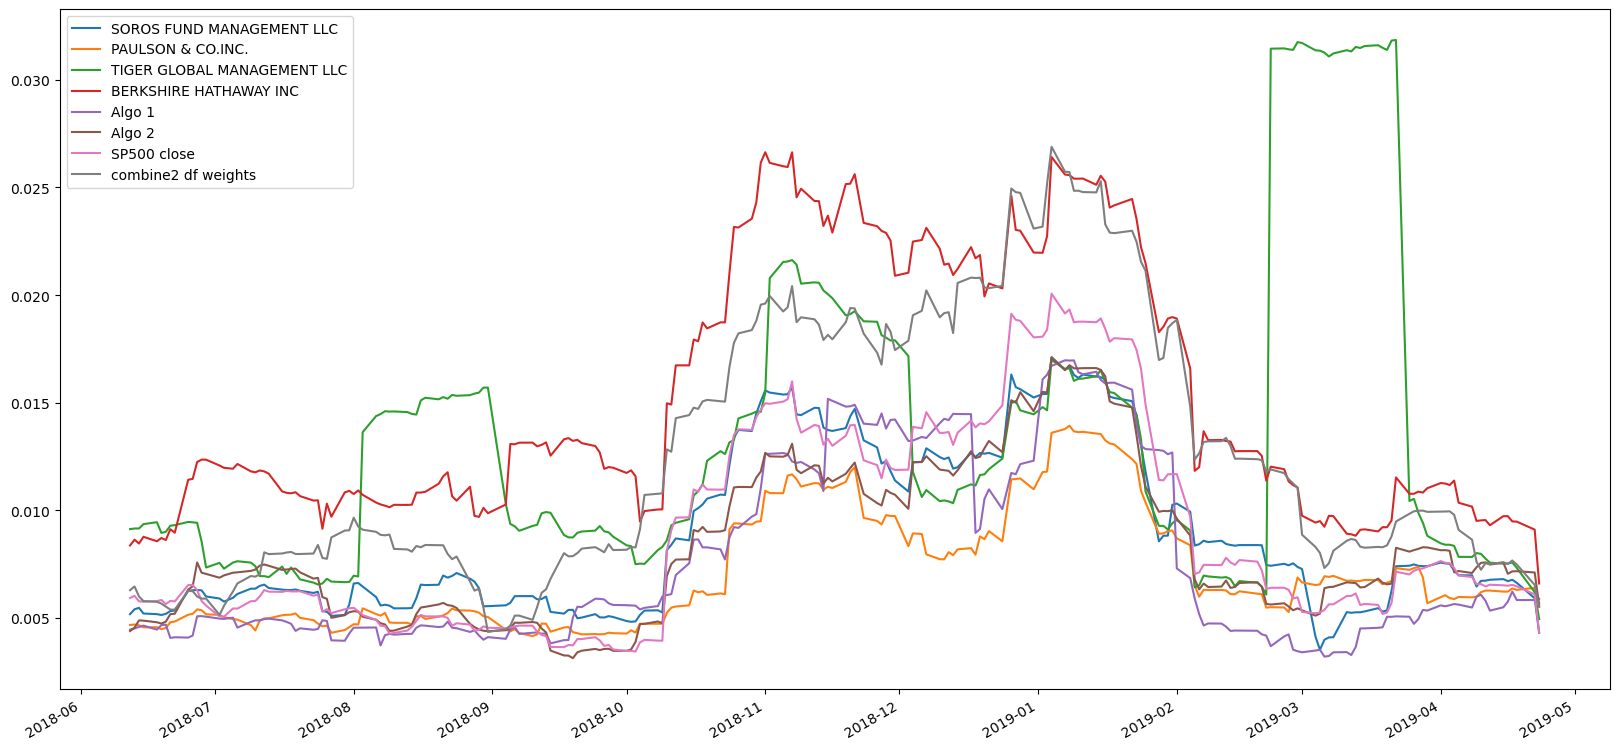

In [252]:
# Calculate rolling standard deviation
combineallrollingstd21=combineall.rolling(window=21).std()
# Plot rolling standard deviation
combineallrollingstd21.plot(figsize=(20,10))

### Calculate and plot the correlation

<Axes: >

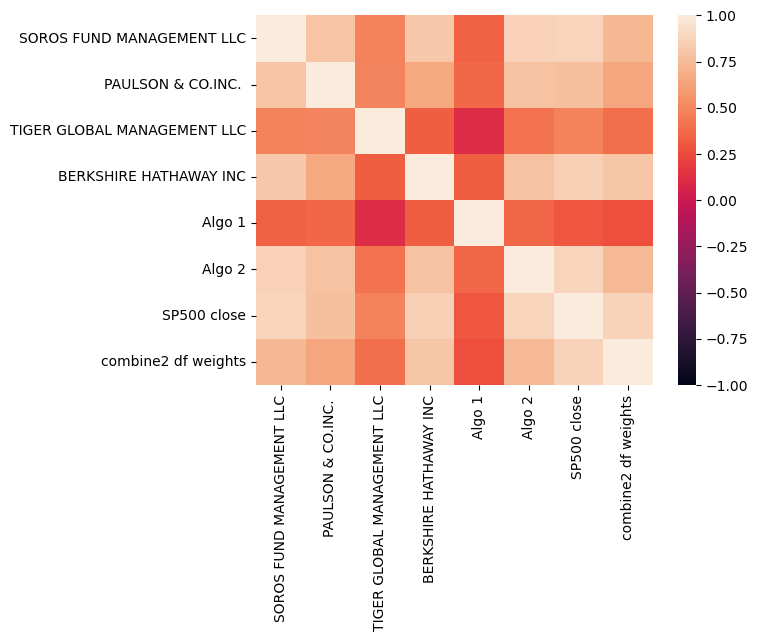

In [254]:
# Calculate and plot the correlation
sns.heatmap(combineall.corr(), vmin=-1, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: >

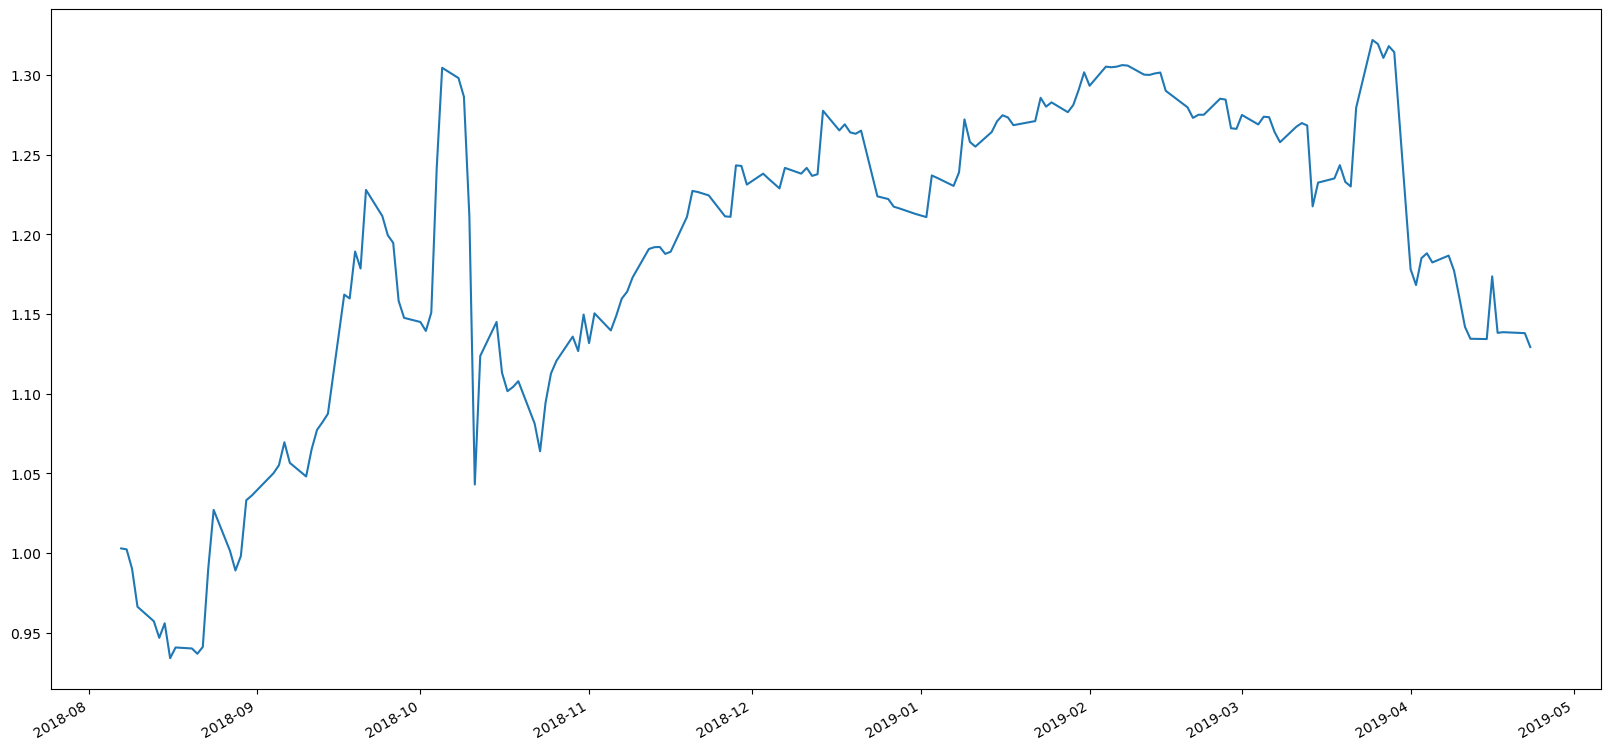

In [256]:
# Calculate and plot Beta
covariance60=combineall['combine2 df weights'].rolling(window=60).cov(combineall['SP500 close'])
Variance60=combineall['SP500 close'].rolling(window=60).var()
Rolling60beta=covariance60/Variance60
Rolling60beta.plot(figsize=(20,10))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [237]:
# Calculate Annualized Sharpe Ratios
sharperatio=(combineall.mean()*252)/(combineall.std()*np.sqrt(252))


<Axes: >

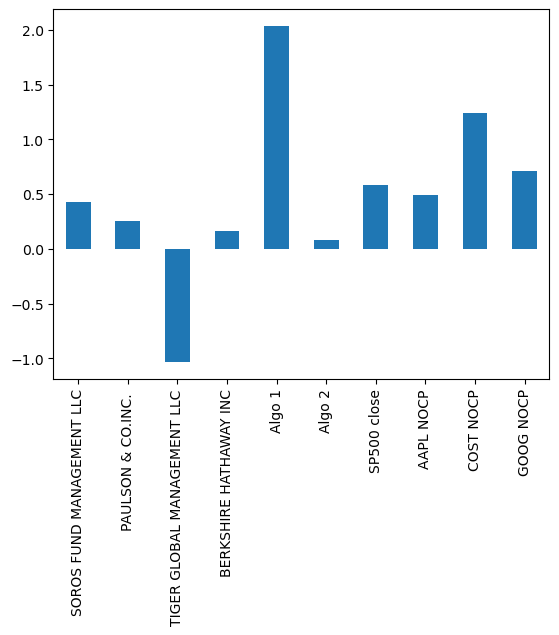

In [238]:
# Visualize the sharpe ratios as a bar plot
sharperatio.plot(kind='bar')

### How does your portfolio do?

AAPL NOCP performace was below the market but COST NOCP and GOOG NOCP did better than the market. Over all, I'm happy with my portfolio.